In [2]:
# Import the load_iris function
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# To check accuracy
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Create object of the dataset
iris_data = load_iris()
# Print columns
print("Feature names: ", iris_data.feature_names)
# Classes of targets
print("Target Names: ",iris_data.target_names)
#Integers representing the species: 0 = setosa, 1=versicolor, 2=virginica
print("Target: ", iris_data.target)
# Print classes of target

print("Shape of dataset: ", iris_data.data.shape)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names:  ['setosa' 'versicolor' 'virginica']
Target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Shape of dataset:  (150, 4)


In [4]:
# Feature matrix in a object named X
X = iris_data.data
# response vector in a object named y
y = iris_data.target

In [5]:
# Split the dataset into train and testing dataset
# 'random_state' parameter makes the data split the same way every time it is split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Shape of training dataset XLabel: ", X_train.shape)
print("Shape of testing dataset XLabel: ", X_test.shape)
print("Shape of training dataset YLabel: ", y_train.shape)
print("Shape of testing dataset YLabel: ", y_test.shape)


Shape of training dataset XLabel:  (120, 4)
Shape of testing dataset XLabel:  (30, 4)
Shape of training dataset YLabel:  (120,)
Shape of testing dataset YLabel:  (30,)


In [6]:
# Now we need to find appropriate value of k
k_range = range(1,26)
scores = {}
scores_list = []
# We loop from 1 to 26 to get best value of K
for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	y_pred = knn.predict(X_test)
	accuracy_score_value = metrics.accuracy_score(y_test, y_pred)
	scores[k] = accuracy_score_value
	scores_list.append(accuracy_score_value)


{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

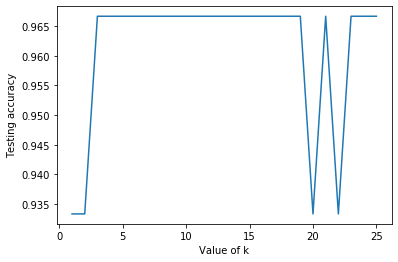

In [7]:

# Now we can plot a graph to see relationship b/w value of k and accuracy
plt.plot(k_range, scores_list)
plt.xlabel("Value of k")
plt.ylabel("Testing accuracy")

scores

In [8]:
# Here we can see above that k = 3 to 19w we have maximum accuracy 96.66%, it can change if random_state is different
# Let's consider k as 5
# And retrain the model, annd that will be our final model to make predictions.
final_k = 5
knn = KNeighborsClassifier(n_neighbors=final_k)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
classes = {0:'setosa',1:'versicolor',2:'virginica'}
#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[2,4,1,2],
         [5,3,6,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

setosa
virginica
